# Exploratory Data Analysis of Kickstarter Project Data

**Description:**  
There’s a free dataset on Kaggle with Kickstarter project data from May 2009 to March 2018. Let's perform some EDA on the data (Exploratory Data Analysis) to gather any insights. In the future for a more challenging project, we can apply machine learning to the dataset to predict whether a project will succeed or not.

https://www.kaggle.com/kemical/kickstarter-projects

*Note: the dataset is in a zip file with 2 csv files in it: 2016 and 2018.  The data in both files is mostly the same but the 2016 one is older and uses a non-standard format, so for this let's just use the 2018 file only.*

**Questions to Answer:**  
1a. Examine the `state` column to see unique values and counts.  
1b. Show a pie chart of the `state` project count for all projects.  
1c. Create a new "Completed" dataframe that removes any rows with state of 'live', 'undefined', or suspended.  
*note - from here out we'll be looking at the completed project data unless mentioned otherwise*

2a. What is the overall success rate for all completed kickstarter projects?  
2b. Which 5 projects were pledged the most money (usd_pledged_real)?  
2c. Which 5 projects had the most backers?  
2d. Which year had the most competition? (# of projects)  

3a. What is the success rate for all projects broken down by `main_category`?  
3b. Show a horizontal bar chart for project success rate by `main_category`, sorted by highest to lowest.  
3c. Within the Games `main_category`, what is the success rate for each `category` within it?  

4a. Calculate the 'pct_of_goal' for each completed project.  
4b. What were the top 5 projects when looking at pct_of_goal for all time?  
4c. Plot a histogram distribution of all completed projects by pct_of_goal  
4d. Create 2 histogram subplots by pct_of_goal: 1) state=successful, and 2) all others (failed)  

5a. What is the average `usd_goal_real` for all *completed* kickstarter projects, broken down by `main_category`.  
5b. What is the median `usd_goal_real` for all *completed* kickstarter projects, broken down by `main_category`.  
5c. What is the average `usd_pledged_real` for all *completed* kickstarter projects, broken down by `main_category`.  
5d. What is the median `usd_pledged_real` for all *completed* kickstarter projects, broken down by `main_category`.  
5e. What insights does this information provide? (be creative)  
5f. Based on this information, if someone wanted to choose the `main_category` with the highest combined success rate and pledged dollar amount, which one would you recommend?  

6a. Create a new column 'months' that shows how many months the project was active between launch and deadline.  
6b. Compare the avg months for successful projects vs non-successful.  Add visuals if you'd like.  
6c. Does the length of a project in months seem to have an impact?  

*Let's zoom in on Games: Video Games (main_category: category)*

7a. Calculate the expected value for the Games: Video Games category, with the expected value defined as (median of usd_pledged_real)* (success rate of completed projects).  
7b. Do this again but broken down by deadline year  
7c. Show this in a bar chart  
7d. What insights does this data provide you?  

*Let's zoom in on personal planners*

8a. Calculate the count, success rate, and pct_of_goal for all projects with 'planner' in the name.  
8b. How about all projects with both 'planner' and 'Panda' in the name?  

*Bonus insights* - feel free to add any other interesting findings from the dataset here  

*Future ML project:* Given a sample kickstarter project, can you predict the usd_pledged_real, and whether it will be successful?  What features (data points) are most important in determining if a project will be successful or not?

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from datetime import datetime
from zipfile import ZipFile   # to unzip files pulled from Kaggle API
import kaggle  # Kaggle API to pull the dataset files directly from their website

In [2]:
# Set the style for viz
plt.style.use('seaborn-deep')
sns.set_style('whitegrid')

## Download and Import the Data from Kaggle

In [3]:
# uncomment below if you haven't installed the kaggle api
# !pip install kaggle

In [4]:
# Download the Kickstarter dataset
# Note that you'll need to have your Kaggle API key saved on your computer for this to work
!kaggle datasets download kemical/kickstarter-projects

kickstarter-projects.zip: Skipping, found more recently modified local copy (use --force to force download)


In [5]:
# files are compressed in a zip so use this to access them
zf = ZipFile('kickstarter-projects.zip')
zf.infolist()

[<ZipInfo filename='ks-projects-201612.csv' compress_type=deflate file_size=46500324 compress_size=17193872>,
 <ZipInfo filename='ks-projects-201801.csv' compress_type=deflate file_size=58030359 compress_size=21376870>]

In [6]:
# Import the 2018 data

ks = pd.read_csv(zf.open('ks-projects-201801.csv'))
ks.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


The 2016 dataset is not in standard utf-8 so Pandas can't read it unless it's converted

In [7]:
import chardet  # this is to detect what character enconding they're using
rawdata = zf.open('ks-projects-201612.csv')
chardet.detect(rawdata.read(100000))

{'encoding': 'Windows-1252', 'confidence': 0.73, 'language': ''}

In [8]:
ks2016 = pd.read_csv(zf.open('ks-projects-201612.csv'), encoding='Windows-1252')
ks2016.head()

C:\Users\brian\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (13,14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09 11:36:00,1000,2015-08-11 12:12:28,0,failed,0,GB,0,NaN,NaN,NaN,NaN
1,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26 00:20:50,45000,2013-01-12 00:20:50,220,failed,3,US,220,NaN,NaN,NaN,NaN
2,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16 04:24:11,5000,2012-03-17 03:24:11,1,failed,1,US,1,NaN,NaN,NaN,NaN
3,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29 01:00:00,19500,2015-07-04 08:35:03,1283,canceled,14,US,1283,NaN,NaN,NaN,NaN
4,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01 13:38:27,50000,2016-02-26 13:38:27,52375,successful,224,US,52375,NaN,NaN,NaN,NaN


Looks like the data is the same, so let's just use the 2018 dataset.  It has more recent data and is in standard format.  

In [9]:
# Remove 2016 data from memory.
%xdel ks2016

## Data Cleaning

In [10]:
ks.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [11]:
ks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 15 columns):
ID                  378661 non-null int64
name                378657 non-null object
category            378661 non-null object
main_category       378661 non-null object
currency            378661 non-null object
deadline            378661 non-null object
goal                378661 non-null float64
launched            378661 non-null object
pledged             378661 non-null float64
state               378661 non-null object
backers             378661 non-null int64
country             378661 non-null object
usd pledged         374864 non-null float64
usd_pledged_real    378661 non-null float64
usd_goal_real       378661 non-null float64
dtypes: float64(5), int64(2), object(8)
memory usage: 43.3+ MB


In [12]:
ks.set_index('ID', inplace=True)
ks.head()

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
ID,,,,,,,,,,,,,,
1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


Change dates to datetime format

In [13]:
ks['deadline'] = pd.to_datetime(ks['deadline'])
ks['launched'] = pd.to_datetime(ks['launched'])
ks.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 378661 entries, 1000002330 to 999988282
Data columns (total 14 columns):
name                378657 non-null object
category            378661 non-null object
main_category       378661 non-null object
currency            378661 non-null object
deadline            378661 non-null datetime64[ns]
goal                378661 non-null float64
launched            378661 non-null datetime64[ns]
pledged             378661 non-null float64
state               378661 non-null object
backers             378661 non-null int64
country             378661 non-null object
usd pledged         374864 non-null float64
usd_pledged_real    378661 non-null float64
usd_goal_real       378661 non-null float64
dtypes: datetime64[ns](2), float64(5), int64(1), object(6)
memory usage: 43.3+ MB


#### Look into any missing data

In [14]:
ks.isna().sum()

name                   4
category               0
main_category          0
currency               0
deadline               0
goal                   0
launched               0
pledged                0
state                  0
backers                0
country                0
usd pledged         3797
usd_pledged_real       0
usd_goal_real          0
dtype: int64

In [15]:
ks[ks['name'].isna()]

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
ID,,,,,,,,,,,,,,
1848699072,NaN,Narrative Film,Film & Video,USD,2012-02-29,200000.0,2012-01-01 12:35:31,100.0,failed,1,US,100.00,100.00,200000.00
634871725,NaN,Video Games,Games,GBP,2013-01-06,2000.0,2012-12-19 23:57:48,196.0,failed,12,GB,317.73,316.05,3224.97
648853978,NaN,Product Design,Design,USD,2016-07-18,2500.0,2016-06-18 05:01:47,0.0,suspended,0,US,0.00,0.00,2500.00
796533179,NaN,Painting,Art,USD,2011-12-05,35000.0,2011-11-06 23:55:55,220.0,failed,5,US,220.00,220.00,35000.00


It's fine, i'll keep em

## Data Analysis

Taking a quick look at the data before answering the Challenge questions

In [16]:
# look at main categories
ks['main_category'].value_counts().to_frame()

,main_category
Film & Video,63585
Music,51918
Publishing,39874
Games,35231
Technology,32569
Design,30070
Art,28153
Food,24602
Fashion,22816
Theater,10913


In [17]:
# look at categories (sub-categories within categories)
ks['category'].value_counts().to_frame()

,category
Product Design,22314
Documentary,16139
Music,15727
Tabletop Games,14180
Shorts,12357
...,...
Residencies,69
Letterpress,49
Chiptune,35
Literary Spaces,27


In [18]:
# Look at Main Category broken down by Category in hierarchy
ks.groupby(['main_category', 'category']).mean()

goal       pledged     backers  \
main_category category                                                  
Art           Art              48928.058694   4094.137150   44.748697   
              Ceramics         13698.081967   5367.204000   47.714754   
              Conceptual Art   50071.740612   1661.477515   26.845631   
              Digital Art      11130.547273   2526.301961   32.539376   
              Illustration     35800.135109   4648.380428   64.698898   
...                                     ...           ...         ...   
Theater       Immersive       150548.857576   4575.270667   45.357576   
              Musical          57729.682366   4950.294830   46.153341   
              Plays            12233.005806   3452.115581   37.283745   
              Spaces          276676.028169  11081.795211  100.225352   
              Theater          12646.546353   3963.230962   48.556610   

                              usd pledged  usd_pledged_real  usd_goal_real  
main_category category                                                      
Art           Art             2932.295249       3583.300344   47390.449324  
              Ceramics        3460.919836       4705.871639   12958.270984  
              Conceptual Art  1417.431534       1627.221913   43058.718340  
              Digital Art     1603.850906       1883.514160   10565.531605  
              Illustration    2302.112954       3429.812419   28901.612482  
...                                   ...               ...            ...  
Theater       Immersive       3689.468364       4591.354273  151793.056182  
              Musical         4046.600942       4903.114020   54186.796813  
              Plays           2420.760588       3131.395377   11323.381974  
              Spaces          7547.819906      10788.126995  274208.108028  
              Theater         3802.367300       3971.313426   12779.064683  

[170 rows x 6 columns]

In [19]:
# Look at Categories within the `Games` main_category
ks[ks['main_category']=='Games'].groupby('category').mean()

,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real
category,,,,,,
Games,55731.222312,6862.093041,83.408555,5662.533380,6547.962514,52439.499120
Gaming Hardware,123542.511682,40178.519416,284.074766,36979.348832,40089.047780,77286.423248
Live Games,177160.558095,2681.264314,23.365714,1422.456000,2211.371819,172522.384752
Mobile Games,45896.916713,2645.085892,20.816098,910.993387,1409.468178,29806.699419
Playing Cards,12430.482179,9154.293348,155.740889,4867.349018,6726.929944,10732.051478
Puzzles,20097.731602,6675.291299,116.017316,4299.588874,6138.909437,12832.804069
Tabletop Games,15805.223766,34111.781137,426.601199,23220.334012,32703.317869,14695.385157
Video Games,86730.084533,18203.355211,373.584531,16470.524955,18280.109172,76740.858763


In [20]:
# look at countries
ks['country'].value_counts().to_frame().head(7)

,country
US,292627
GB,33672
CA,14756
AU,7839
DE,4171
"N,0""",3797
FR,2939


## Questions to Answer:

#### 1a. Examine the state column to see unique values and counts.

In [21]:
state = ks['state'].value_counts().to_frame()
state

,state
failed,197719
successful,133956
canceled,38779
undefined,3562
live,2799
suspended,1846


#### 1b. Show a pie chart of the state project count for all projects.

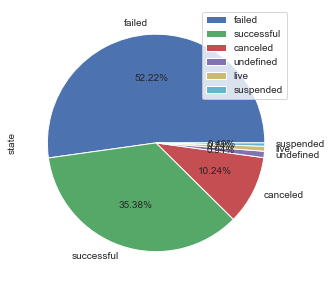

In [22]:
state.plot.pie(y='state', figsize=(5,5), autopct='%.2f%%')

#### 1c. Create a new "Completed" dataframe that removes any rows with state of 'live', 'undefined', or suspended.

In [23]:
completed = ks[(ks['state']=='successful') | (ks['state']=='failed') | (ks['state']=='canceled')]
completed.state.value_counts()

failed        197719
successful    133956
canceled       38779
Name: state, dtype: int64

#### 2a. What is the overall success rate for all completed kickstarter projects?

In [24]:
len(completed[completed.state=='successful']) / len(completed) * 100

36.15995508214245

36.16% Success rate (as of 2/5/2020 when this was run)

#### 2b. Which 5 projects were pledged the most money (usd_pledged_real)?

In [25]:
# check out top 10 for fun
completed.sort_values('usd_pledged_real', ascending=False).head(10)

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
ID,,,,,,,,,,,,,,
1799979574,"Pebble Time - Awesome Smartwatch, No Compromises",Product Design,Design,USD,2015-03-28,500000.0,2015-02-24 15:44:42,20338986.27,successful,78471,US,20338986.27,20338986.27,500000.0
342886736,COOLEST COOLER: 21st Century Cooler that's Act...,Product Design,Design,USD,2014-08-30,50000.0,2014-07-08 10:14:37,13285226.36,successful,62642,US,13285226.36,13285226.36,50000.0
2103598555,"Pebble 2, Time 2 + All-New Pebble Core",Product Design,Design,USD,2016-06-30,1000000.0,2016-05-24 15:49:52,12779843.49,successful,66673,US,12779843.49,12779843.49,1000000.0
545070200,Kingdom Death: Monster 1.5,Tabletop Games,Games,USD,2017-01-08,100000.0,2016-11-25 06:01:41,12393139.69,successful,19264,US,5228482.00,12393139.69,100000.0
506924864,Pebble: E-Paper Watch for iPhone and Android,Product Design,Design,USD,2012-05-19,100000.0,2012-04-11 06:59:04,10266845.74,successful,68929,US,10266845.74,10266845.74,100000.0
565687737,The World's Best TRAVEL JACKET with 15 Feature...,Product Design,Design,USD,2015-09-03,20000.0,2015-07-07 13:52:34,9192055.66,successful,44949,US,9192055.66,9192055.66,20000.0
1955357092,Exploding Kittens,Tabletop Games,Games,USD,2015-02-20,10000.0,2015-01-20 19:00:19,8782571.99,successful,219382,US,8782571.99,8782571.99,10000.0
1033978702,OUYA: A New Kind of Video Game Console,Gaming Hardware,Games,USD,2012-08-09,950000.0,2012-07-10 14:44:41,8596474.58,successful,63416,US,8596474.58,8596474.58,950000.0
647013276,"THE 7th CONTINENT – What Goes Up, Must Come Down.",Tabletop Games,Games,USD,2017-10-19,40000.0,2017-09-26 20:00:02,7072757.00,successful,43733,US,1574139.50,7072757.00,40000.0


#### 2c. Which 5 projects had the most backers?

In [26]:
# check out top 10 for fun
completed.sort_values('backers', ascending=False).head(10)

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
ID,,,,,,,,,,,,,,
1955357092,Exploding Kittens,Tabletop Games,Games,USD,2015-02-20,10000.0,2015-01-20 19:00:19,8782571.99,successful,219382,US,8782571.99,8782571.99,10000.00
1386523707,Fidget Cube: A Vinyl Desk Toy,Product Design,Design,USD,2016-10-20,15000.0,2016-08-30 22:02:09,6465690.30,successful,154926,US,13770.00,6465690.30,15000.00
557230947,"Bring Reading Rainbow Back for Every Child, Ev...",Web,Technology,USD,2014-07-02,1000000.0,2014-05-28 15:05:45,5408916.95,successful,105857,US,5408916.95,5408916.95,1000000.00
1755266685,The Veronica Mars Movie Project,Narrative Film,Film & Video,USD,2013-04-13,2000000.0,2013-03-13 15:42:22,5702153.38,successful,91585,US,5702153.38,5702153.38,2000000.00
1929840910,Double Fine Adventure,Video Games,Games,USD,2012-03-14,400000.0,2012-02-09 02:52:52,3336371.92,successful,87142,US,3336371.92,3336371.92,400000.00
1118803016,Bears vs Babies - A Card Game,Tabletop Games,Games,USD,2016-11-18,10000.0,2016-10-18 18:59:32,3215679.79,successful,85581,US,1231455.60,3215679.79,10000.00
1799979574,"Pebble Time - Awesome Smartwatch, No Compromises",Product Design,Design,USD,2015-03-28,500000.0,2015-02-24 15:44:42,20338986.27,successful,78471,US,20338986.27,20338986.27,500000.00
286165030,Torment: Tides of Numenera,Video Games,Games,USD,2013-04-06,900000.0,2013-03-06 14:47:37,4188927.49,successful,74405,US,4188927.49,4188927.49,900000.00
458565935,Project Eternity,Video Games,Games,USD,2012-10-17,1100000.0,2012-09-14 19:01:04,3986929.49,successful,73986,US,3986929.49,3986929.49,1100000.00


#### 2d. Which year had the most competition? (# of projects)

In [27]:
completedLaunch = completed.reset_index()
completedLaunch.set_index('launched', inplace=True)
completedLaunch.sort_values('launched').head(10)
# completedLaunch['ID'].resample('Y').count()

,ID,name,category,main_category,currency,deadline,goal,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
launched,,,,,,,,,,,,,,
1970-01-01 01:00:00,330942060,"Help RIZ Make A Charity Album: 8 Songs, 8 Caus...",Music,Music,USD,2010-05-04,10000.0,0.0,canceled,0,US,0.0,0.0,10000.0
1970-01-01 01:00:00,1384087152,"""ICHOR"" (Canceled)",Film & Video,Film & Video,USD,2010-05-21,700.0,0.0,canceled,0,US,0.0,0.0,700.0
1970-01-01 01:00:00,1245461087,1st Super-Size Painting - Social Network Owned...,Art,Art,USD,2010-08-14,15000.0,0.0,canceled,0,US,0.0,0.0,15000.0
1970-01-01 01:00:00,1014746686,Salt of the Earth: A Dead Sea Movie (Canceled),Film & Video,Film & Video,USD,2010-09-15,5000.0,0.0,canceled,0,US,0.0,0.0,5000.0
1970-01-01 01:00:00,1480763647,"Support Solo Theater! Help ""Ungrateful Daughte...",Theater,Theater,USD,2010-06-01,4000.0,0.0,canceled,0,US,0.0,0.0,4000.0
1970-01-01 01:00:00,462917959,Identity Communications Infographic (Canceled),Design,Design,USD,2010-04-10,500.0,0.0,canceled,0,US,0.0,0.0,500.0
2009-04-21 21:02:48,1860890148,Grace Jones Does Not Give A F$#% T-Shirt (limi...,Fashion,Fashion,USD,2009-05-31,1000.0,625.0,failed,30,US,625.0,625.0,1000.0
2009-04-23 00:07:53,709707365,CRYSTAL ANTLERS UNTITLED MOVIE,Shorts,Film & Video,USD,2009-07-20,80000.0,22.0,failed,3,US,22.0,22.0,80000.0
2009-04-24 21:52:03,1703704063,drawing for dollars,Illustration,Art,USD,2009-05-03,20.0,35.0,successful,3,US,35.0,35.0,20.0


Looks like there's some garbage launch dates: 6 projects with 1/1/1970 when the oldest projects are all in 2009.  Exclude those 6 deals in the competition calculation

In [28]:
completedLaunch.loc['2009-01-01':]['ID'].resample('Y').count().sort_values(ascending=False)

launched
2015-12-31    74199
2014-12-31    66724
2016-12-31    56411
2017-12-31    49185
2013-12-31    44791
2012-12-31    41111
2011-12-31    26193
2010-12-31    10503
2009-12-31     1329
2018-12-31        2
Name: ID, dtype: int64

2015 was the year with the most projects launched (competition) with 74,199.  Interestingly, the project count dropped to 56,411 in 2016, and then dropped again to 49,185 in 2017.

#### 3a. What is the success rate for all projects broken down by main_category? 

In [29]:
# get counts by category
allByMC = completed.groupby('main_category')['state'].count().to_frame()
allByMC.columns=['count']
allByMC

,count
main_category,
Art,27863
Comics,10720
Crafts,8661
Dance,3736
Design,29516
Fashion,22425
Film & Video,62282
Food,24265
Games,34723


In [30]:
# get counts of successful by category
successByMC = completed[completed['state']=='successful'].groupby('main_category').count()['state'].to_frame()
successByMC.columns=['count']
successByMC

,count
main_category,
Art,11510
Comics,5842
Crafts,2115
Dance,2338
Design,10550
Fashion,5593
Film & Video,23623
Food,6085
Games,12518


In [31]:
# now take successful counts / total counts * 100 to get percentage successful
allByMC['successRate'] = successByMC / allByMC
allByMC

,count,successRate
main_category,,
Art,27863,0.413093
Comics,10720,0.544963
Crafts,8661,0.244198
Dance,3736,0.625803
Design,29516,0.357433
Fashion,22425,0.249409
Film & Video,62282,0.379291
Food,24265,0.250773
Games,34723,0.360510


#### 3b. Show a horizontal bar chart for project success rate by main_category, sorted by highest to lowest.

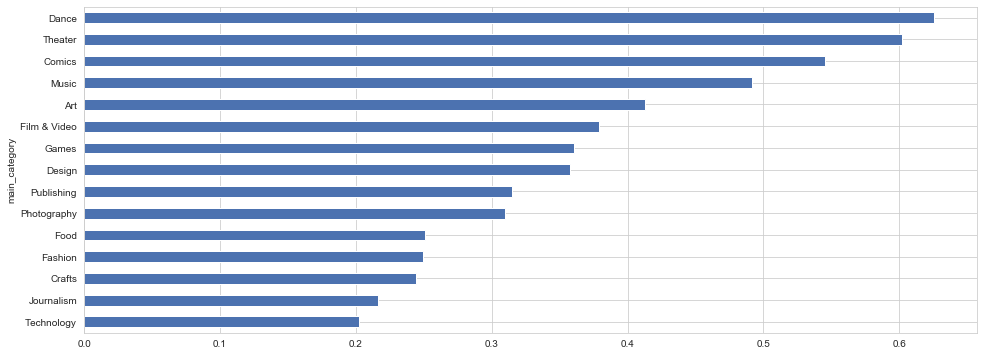

In [32]:
allByMC['successRate'].sort_values().plot.barh(figsize=(16,6))

In [33]:
# I'm going to add a successful column to the completed dataframe. Will make these analyses much easier
temp = pd.get_dummies(completed['state'])
temp = temp['successful'].to_frame()
temp.head(7)

,successful
ID,
1000002330,0
1000003930,0
1000004038,0
1000007540,0
1000011046,0
1000014025,1
1000023410,1


In [34]:
completed = pd.concat([completed, temp], axis=1)
completed.head(7)

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,successful
ID,,,,,,,,,,,,,,,
1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95,0
1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00,0
1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00,0
1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00,0
1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00,0
1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01,50000.0,2016-02-26 13:38:27,52375.0,successful,224,US,52375.0,52375.0,50000.00,1
1000023410,Support Solar Roasted Coffee & Green Energy! ...,Food,Food,USD,2014-12-21,1000.0,2014-12-01 18:30:44,1205.0,successful,16,US,1205.0,1205.0,1000.00,1


#### 3c. Within the Games main_category, what is the success rate for each category within it?

In [35]:
# first get the # of successful projects
gamesCatSuccess = completed[completed['main_category']=='Games'].groupby('category')['successful'].sum().to_frame()
gamesCatSuccess

,successful
category,
Games,779.0
Gaming Hardware,99.0
Live Games,180.0
Mobile Games,153.0
Playing Cards,967.0
Puzzles,88.0
Tabletop Games,7866.0
Video Games,2386.0


In [36]:
# then get the total count
gamesCatCount = completed[completed['main_category']=='Games'].groupby('category')['successful'].count().to_frame()
gamesCatCount

,successful
category,
Games,3171
Gaming Hardware,386
Live Games,1012
Mobile Games,1752
Playing Cards,2447
Puzzles,226
Tabletop Games,14038
Video Games,11691


In [37]:
# now calculate the success rate
gamesCatSuccessRate = (gamesCatSuccess / gamesCatCount * 100).sort_values(by='successful', ascending=False)
gamesCatSuccessRate

,successful
category,
Tabletop Games,56.033623
Playing Cards,39.517777
Puzzles,38.938053
Gaming Hardware,25.647668
Games,24.566383
Video Games,20.408862
Live Games,17.786561
Mobile Games,8.732877


#### 4a. Calculate the 'pct_of_goal' for each completed project.

In [38]:
completed['pct_of_goal'] = completed['usd_pledged_real'] / completed['usd_goal_real']
completed.head()

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,successful,pct_of_goal
ID,,,,,,,,,,,,,,,,
1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95,0,0.000000
1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00,0,0.080700
1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00,0,0.004889
1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00,0,0.000200
1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00,0,0.065795


#### 4b. What were the top 5 projects when looking at pct_of_goal for all time?

In [40]:
# getting top 10 for fun
completed.sort_values('pct_of_goal', ascending=False).head(10)

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,successful,pct_of_goal
ID,,,,,,,,,,,,,,,,
9509582,VULFPECK /// The Beautiful Game,Music,Music,USD,2016-10-17,1.0,2016-08-18 09:04:03,104277.89,successful,3917,US,23874.13,104277.89,1.00,1,104277.89000
1947298033,Re-covering with Friends,Rock,Music,USD,2016-12-13,1.0,2016-10-14 19:04:27,68764.10,successful,955,US,9306.00,68764.10,1.00,1,68764.10000
907870443,VULFPECK /// Thrill of the Arts,Music,Music,USD,2015-10-09,1.0,2015-08-10 19:31:56,55266.57,successful,1673,US,55266.57,55266.57,1.00,1,55266.57000
1388400809,Energy Hook,Video Games,Games,USD,2013-06-10,1.0,2013-05-10 01:22:38,41535.01,successful,1622,US,41535.01,41535.01,1.00,1,41535.01000
1413857335,Band of Brothers 2nd Chance,Tabletop Games,Games,USD,2016-08-02,1.0,2016-07-12 00:29:12,32843.00,successful,268,US,26095.00,32843.00,1.00,1,32843.00000
521903377,CLOCKWRIGHT: Large-Scale Analogue Time Machines,Sculpture,Art,USD,2016-01-13,1.0,2015-12-14 12:57:33,27588.23,successful,162,US,27588.23,27588.23,1.00,1,27588.23000
951161619,Heartbreak Hits – Theo Katzman's Second LP,Music,Music,USD,2017-01-03,1.0,2016-11-04 15:52:18,24675.00,successful,665,US,7375.00,24675.00,1.00,1,24675.00000
550443638,"Penny Arcade's Podcast, ""Downloadable Content""...",Radio & Podcasts,Publishing,USD,2013-05-31,10.0,2013-05-08 20:02:14,230360.67,successful,5001,US,230360.67,230360.67,10.00,1,23036.06700
1077219132,THE 'mi8' RISES | The Best Wireless Duo Stereo...,Hardware,Technology,USD,2016-10-13,1.0,2016-09-13 18:03:12,22603.00,successful,163,US,9154.00,22603.00,1.00,1,22603.00000


#### 4c. Plot a histogram distribution of all completed projects by pct_of_goal

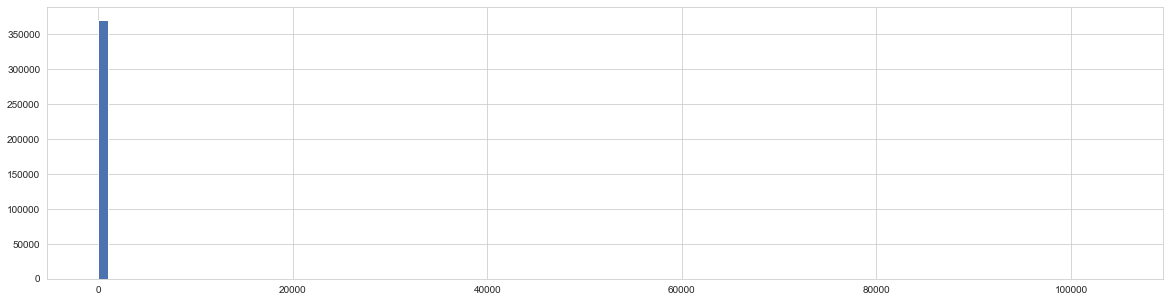

In [48]:
completed['pct_of_goal'].hist(bins=100, figsize=(20,5))

Woah... there are some outliers that are causing some major issues here.  Resolve that to make the histogram more informative

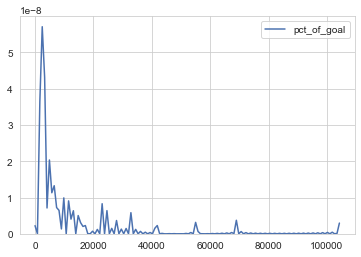

In [57]:
# look at the kernel density estimate
sns.kdeplot(data=completed['pct_of_goal'])

Looks like we can set a cutoff at 20,000 to get the majority of the data

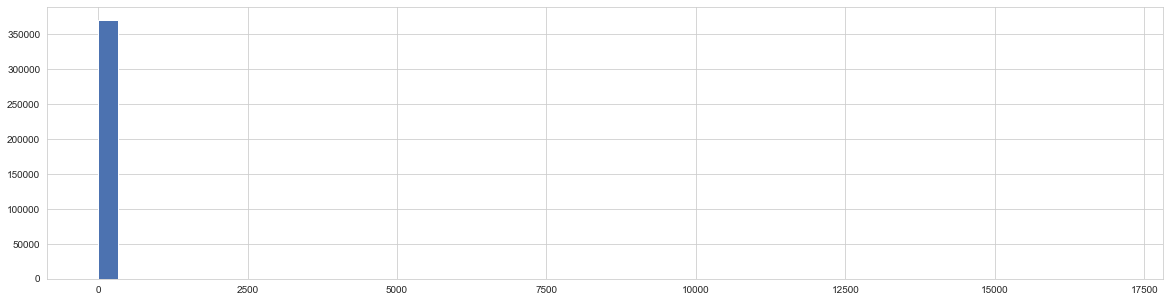

In [55]:
completed[completed['pct_of_goal']<20000]['pct_of_goal'].hist(bins=50, figsize=(20,5))

Need to zoom in more.  After playing around with the data, we'll need to zoom in to anything < 2 (200% of goal) to get useful results

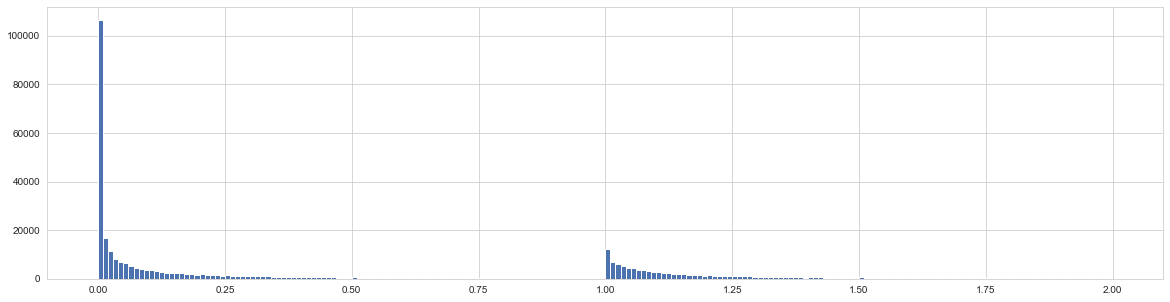

In [160]:
# using 200 bins so each bar represents 1% of goal
completed[completed['pct_of_goal']<2]['pct_of_goal'].hist(bins=200, figsize=(20,5))

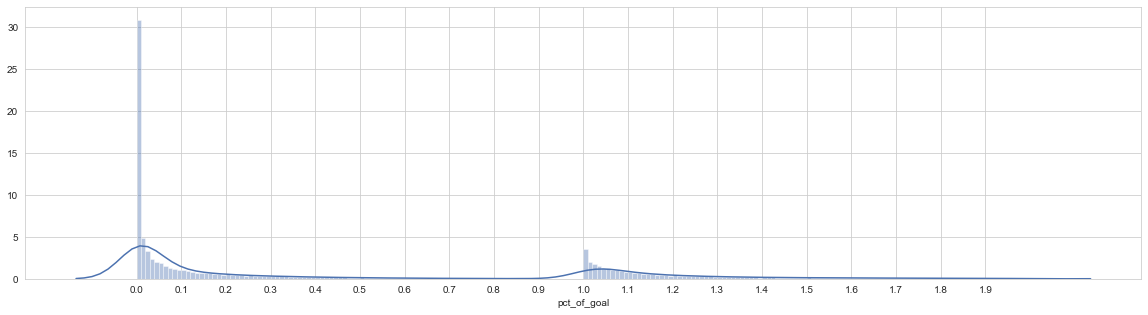

In [162]:
# And the same plot using Seaborn for practice
# using 200 bins so each bar represents 1% of goal
plt.figure(figsize=(20,5))
plt.xticks(np.arange(0,2, step=0.1))
sns.distplot(completed[completed['pct_of_goal']<2]['pct_of_goal'], bins=200)

Interesting...  The vast majority of projects don't even reach 1% of goal.  Also, after about 25% of goal, there's a "deadzone" up to 100% of goal where we get an expected spike from those who *barely* reach their goal.  
Let's take a look at the same barplot but exclude any with <1% of goal

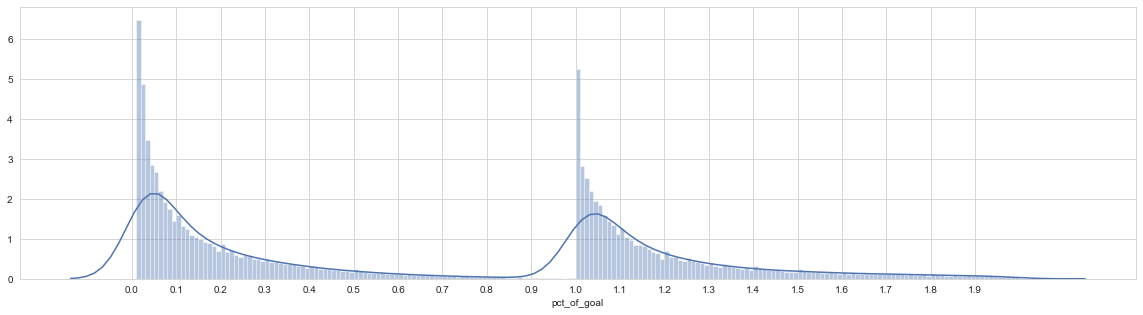

In [163]:
# using 199 bins so each bar represents 1% of goal
plt.figure(figsize=(20,5))
plt.xticks(np.arange(0,2, step=0.1))
sns.distplot(completed[(completed['pct_of_goal']<2) & (completed['pct_of_goal']>.01)]['pct_of_goal'], bins=199)

This zoomed in view is much more informative.  For analyses in future projects, consider excluding projects with <1% of goal since they are junk projects that may be skewing the results.

#### 4d. Create 2 histogram subplots by pct_of_goal: 1) state=successful, and 2) all others (failed)

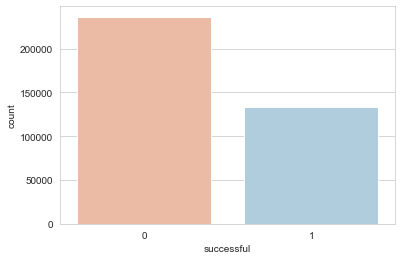

In [83]:
sns.countplot(data=completed, x='successful', palette='RdBu')

#### 5a. What is the average usd_goal_real for all completed kickstarter projects, broken down by main_category. 

In [95]:
round(completed.groupby(by='main_category')['usd_goal_real'].mean(), 0)

main_category
Art              39468.0
Comics           19676.0
Crafts           10423.0
Dance             9409.0
Design           42199.0
Fashion          22530.0
Film & Video     82376.0
Food             48661.0
Games            45148.0
Journalism       65529.0
Music            15719.0
Photography      12267.0
Publishing       22591.0
Technology      102154.0
Theater          27147.0
Name: usd_goal_real, dtype: float64

In [96]:
# also look at only the successful projects
round(completed[completed['state']=='successful'].groupby(by='main_category')['usd_goal_real'].mean(), 0)

main_category
Art              4410.0
Comics           5397.0
Crafts           3013.0
Dance            4601.0
Design          15409.0
Fashion          9081.0
Film & Video    11145.0
Food            11634.0
Games           14857.0
Journalism       8149.0
Music            5737.0
Photography      6491.0
Publishing       5898.0
Technology      26286.0
Theater          5198.0
Name: usd_goal_real, dtype: float64

#### 5b. What is the median usd_goal_real for all completed kickstarter projects, broken down by main_category.

In [97]:
round(completed.groupby(by='main_category')['usd_goal_real'].median(), 0)

main_category
Art              3000.0
Comics           3500.0
Crafts           2330.0
Dance            3310.0
Design          10000.0
Fashion          5984.0
Film & Video     7000.0
Food            10000.0
Games            8000.0
Journalism       5000.0
Music            4000.0
Photography      4000.0
Publishing       5000.0
Technology      20000.0
Theater          3300.0
Name: usd_goal_real, dtype: float64

In [98]:
# also look at only the successful projects
round(completed[completed['state']=='successful'].groupby(by='main_category')['usd_goal_real'].median(), 0)

main_category
Art              2000.0
Comics           2620.0
Crafts           1000.0
Dance            3000.0
Design           7500.0
Fashion          5000.0
Film & Video     5000.0
Food             7344.0
Games            5000.0
Journalism       3000.0
Music            3210.0
Photography      3000.0
Publishing       3000.0
Technology      10000.0
Theater          2650.0
Name: usd_goal_real, dtype: float64

#### 5c. What is the average usd_pledged_real for all completed kickstarter projects, broken down by main_category. 

In [99]:
round(completed.groupby(by='main_category')['usd_pledged_real'].mean(), 0)

main_category
Art              3236.0
Comics           6654.0
Crafts           1651.0
Dance            3478.0
Design          24547.0
Fashion          5762.0
Film & Video     6248.0
Food             5140.0
Games           21288.0
Journalism       2642.0
Music            3924.0
Photography      3585.0
Publishing       3398.0
Technology      21186.0
Theater          4017.0
Name: usd_pledged_real, dtype: float64

In [100]:
# also look at only the successful projects
round(completed[completed['state']=='successful'].groupby(by='main_category')['usd_pledged_real'].mean(), 0)

main_category
Art              6972.0
Comics          11386.0
Crafts           5630.0
Dance            5194.0
Design          62859.0
Fashion         20287.0
Film & Video    13952.0
Food            17349.0
Games           54229.0
Journalism      10345.0
Music            7338.0
Photography     10112.0
Publishing       9437.0
Technology      93086.0
Theater          5973.0
Name: usd_pledged_real, dtype: float64

#### 5d. What is the median usd_pledged_real for all completed kickstarter projects, broken down by main_category. 

In [101]:
round(completed.groupby(by='main_category')['usd_pledged_real'].median(), 0)

main_category
Art              431.0
Comics          1506.0
Crafts            95.0
Dance           1866.0
Design          1926.0
Fashion          245.0
Film & Video     760.0
Food             260.0
Games           1325.0
Journalism        55.0
Music           1010.0
Photography      245.0
Publishing       291.0
Technology       317.0
Theater         1567.0
Name: usd_pledged_real, dtype: float64

In [102]:
# also look at only the successful projects
round(completed[completed['state']=='successful'].groupby(by='main_category')['usd_pledged_real'].median(), 0)

main_category
Art              2631.0
Comics           4000.0
Crafts           1825.0
Dance            3364.0
Design          14619.0
Fashion          6864.0
Film & Video     5210.0
Food             8952.0
Games           10572.0
Journalism       3678.0
Music            3950.0
Photography      3700.0
Publishing       4117.0
Technology      22478.0
Theater          3076.0
Name: usd_pledged_real, dtype: float64

#### 5e. What insights does this information provide? (be creative)

In [105]:
# First let's see what the median pledged / median goal looks like for all projects
(round(completed.groupby(by='main_category')['usd_pledged_real'].median(), 0) / round(completed.groupby(by='main_category')['usd_goal_real'].median(), 0) * 100).sort_values(ascending=False)

main_category
Dance           56.374622
Theater         47.484848
Comics          43.028571
Music           25.250000
Design          19.260000
Games           16.562500
Art             14.366667
Film & Video    10.857143
Photography      6.125000
Publishing       5.820000
Fashion          4.094251
Crafts           4.077253
Food             2.600000
Technology       1.585000
Journalism       1.100000
dtype: float64

In [106]:
# and now just the successful projects
(round(completed[completed['state']=='successful'].groupby(by='main_category')['usd_pledged_real'].median(), 0) / round(completed[completed['state']=='successful'].groupby(by='main_category')['usd_goal_real'].median(), 0) * 100).sort_values(ascending=False)

main_category
Technology      224.780000
Games           211.440000
Design          194.920000
Crafts          182.500000
Comics          152.671756
Fashion         137.280000
Publishing      137.233333
Art             131.550000
Photography     123.333333
Music           123.052960
Journalism      122.600000
Food            121.895425
Theater         116.075472
Dance           112.133333
Film & Video    104.200000
dtype: float64

- The averages (means) are thrown off disproportionately by a few of the large outliers.  So rather than using the mean, the median is the more useful metric here
- The top 6 categories when looking at median pledged / median goal are: 
  - Dance
  - Theater
  - Comics
  - Music
  - Design
  - Games
- Technology is a "feast or famine" category.  It is one of the worst ranked pledged / goal when looking at all projects, but the top ranked when only looking at successful projects
- Journalism and Food seem to be the worst 2 main categories

#### 5f. Based on this information, if someone wanted to choose the main_category with the highest combined success rate and pledged dollar amount, which one would you recommend?

In [112]:
# First recall the count of projects in each main category
allByMC.sort_values(ascending=False)

main_category
Film & Video    62282
Music           49254
Publishing      39047
Games           34723
Technology      31765
Design          29516
Art             27863
Food            24265
Fashion         22425
Theater         10850
Comics          10720
Photography     10675
Crafts           8661
Journalism       4672
Dance            3736
Name: state, dtype: int64

In [107]:
# recall the success rate values
successRateByMC

main_category
Dance           62.580300
Theater         60.221198
Comics          54.496269
Music           49.126974
Art             41.309263
Film & Video    37.929097
Games           36.051032
Design          35.743326
Publishing      31.500499
Photography     30.960187
Food            25.077272
Fashion         24.940914
Crafts          24.419813
Journalism      21.660959
Technology      20.254998
Name: state, dtype: float64

In [109]:
# Median Pledged amounts
round(completed.groupby(by='main_category')['usd_pledged_real'].median(), 0).sort_values(ascending=False)

main_category
Design          1926.0
Dance           1866.0
Theater         1567.0
Comics          1506.0
Games           1325.0
Music           1010.0
Film & Video     760.0
Art              431.0
Technology       317.0
Publishing       291.0
Food             260.0
Photography      245.0
Fashion          245.0
Crafts            95.0
Journalism        55.0
Name: usd_pledged_real, dtype: float64

In [108]:
# Rankings by median pledged amt / median goal amt
(round(completed.groupby(by='main_category')['usd_pledged_real'].median(), 0) / round(completed.groupby(by='main_category')['usd_goal_real'].median(), 0) * 100).sort_values(ascending=False)

main_category
Dance           56.374622
Theater         47.484848
Comics          43.028571
Music           25.250000
Design          19.260000
Games           16.562500
Art             14.366667
Film & Video    10.857143
Photography      6.125000
Publishing       5.820000
Fashion          4.094251
Crafts           4.077253
Food             2.600000
Technology       1.585000
Journalism       1.100000
dtype: float64

The `Dance` category has a surprisingly high success rate, 

#### 6a. Create a new column 'months' that shows how many months the project was active between launch and deadline.

#### 6b. Compare the avg months for successful projects vs non-successful. Add visuals if you'd like.

#### 6c. Does the length of a project in months seem to have an impact?

### Let's zoom in on Games: Video Games (main_category: category)

#### 7a. Calculate the expected value for the Games: Video Games category, with the expected value defined as (median of usd_pledged_real)* (success rate of completed projects).

#### 7b. Do this again but broken down by deadline year

#### 7c. Show this in a bar chart

#### 7d. What insights does this data provide you?

### Let's zoom in on personal planners

#### 8a. Calculate the count, success rate, and pct_of_goal for all projects with 'planner' in the name.

#### 8b. How about all projects with both 'planner' and 'Panda' in the name?

## Bonus insights
Feel free to add any other interesting findings from the dataset here

## Future ML Project Idea: 
Given a sample kickstarter project, can you predict the usd_pledged_real, and whether it will be successful?  
What features (data points) are most important in determining if a project will be successful or not?